# C2M2: Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. 

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.

In [1]:
# Load required libraries
library(testthat)
library(tidyverse)
library(RCurl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete




# Problem 1: Post-Hoc Tests

Recently, your local highschool switched their student lunches from circular pizzas to square pizzas. Suprisingly the school reported a change in the overall testing of students in the following weeks. The school decided to test this theory, and has recorded test results following lunches with four different shaped pizzas. It is up to you to determine if the shapes of pizza does in fact improve student's abilities to take tests, and if so, which shaped pizza results in the best test scores.

The school has tested four different shapes, coded as the following:
* a: Circular
* b: Square
* c: Triangular
* d: Cylindrical

In [2]:
# Load the data
df.pizza = read.csv("pizza.csv")
head(df.pizza)
dim(df.pizza)

,X,shape,score
,<int>,<fct>,<dbl>
1,1,a,78.44676
2,2,a,88.75349
3,3,a,80.19209
4,4,a,84.04420
5,5,a,78.50873
6,6,a,82.34018


[1] 992   3

### 1. (a) Intuition and ANOVA

Instead of jumping into direct comparisons, we should check all the pizza shapes resulted in the same scores. Or, in other words, if at least one shape resulted in different test scores than the others.

Using ggplot, create a boxplot of the different shapes. Save your boxplot as `pizza.boxplot`.

Then determine if at least one shape resulted in different test scores than the others. In `pizza.diff`, answer `TRUE` if there is a difference and `FALSE` if there is not a difference.

[1] TRUE

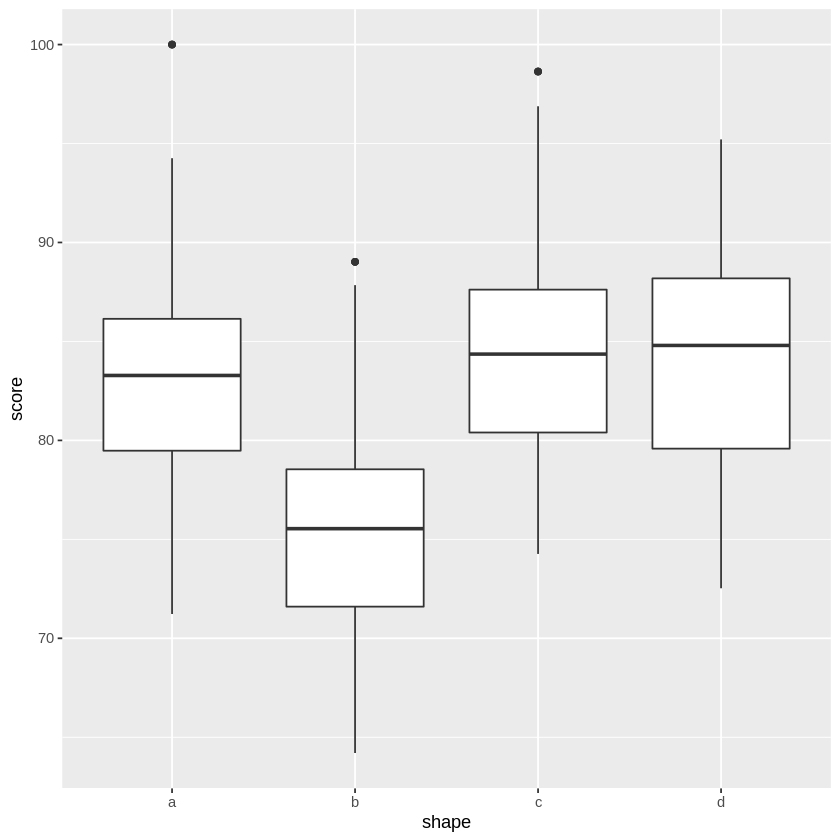

In [3]:
pizza.boxplot = NA
pizza.diff = NA

# your code here
pizza.boxplot = df.pizza %>%
                    ggplot(aes(y = score, x = shape)) +
                    geom_boxplot()

pizza.diff = TRUE

# your code here

pizza.boxplot; pizza.diff

In [4]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (b) Type I Error Rate

The problem with pairwise tests is that of compounding error. As each test has a probability of getting an incorrect answer, then  the chance of at least one test being incorrect increases as you increase the number of tests. For the following, use a significance of $\alpha = 0.05$.

For our data, calculate the probability that at least one test has type 1 error if we conduct pair-wise comparisons for all combinations of labels? Store your answer in `pizza.error`.

Then determine the probability that at least one test has type 1 error for all possible pairwise tests, using the Bonferroni correction. Store your answer as `bonferroni.error`.

In [5]:
pizza.error = NA
bonferroni.error = NA
alpha = 0.05

# # your code here
# # Calculate probability of type I error for pairwise comparisons without correction
# pizza.error <- 1 - (1 - alpha)^(choose(length(unique(df.pizza$shape)), 2))

# # Calculate probability of type I error for pairwise comparisons with Bonferroni correction
# bonferroni.error <- alpha / choose(length(unique(df.pizza$shape)), 2)

# # Print the results
# pizza.error
# bonferroni.error

#somethimgs wrong
m = 6
alpha = 0.05
pizza.error = 1 - (1 - alpha)^m
bonferroni.error =  1 - (1 - (alpha / m))^m


# your code here
pizza.error ; bonferroni.error

[1] 0.2649081

[1] 0.04896984

In [6]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (c) Tukey's Test

Now let's do our post-hoc tests. Using Tukey's Test, determine which shapes result in the same test scores. Store the pairs of shapes that are the same in a dataframe named `pizza.post.hoc` with the first column named `shape.1` and second column named `shape.2`.

For example, if `a-b` and `a-c` are the only two shapes that result in the same scores, your final dataframe would be created by:

`data.frame(shape.1=c("a", "a"), shape.2=c("b", "c"))`

In [7]:
pizza.post.hoc = NA

# your code here


pizza.lmod = lm(score ~ shape, data = df.pizza)
pizza.aov = aov(pizza.lmod)
pizza.TukeyHSD = TukeyHSD(pizza.aov)
results = data.frame(pizza.TukeyHSD$shape)
comparisons = row.names(results)
pvals = results$p.adj

comparisons ; pvals


pizza.post.hoc = data.frame(shape.1 = c("d", "d"), shape.2 = c("a", "c"))

# your code here
pizza.post.hoc


print(pvals)

[1] "b-a" "c-a" "d-a" "c-b" "d-b" "d-c"

[1] 0.00000000 0.01012587 0.08663213 0.00000000 0.00000000 0.87141514

shape.1,shape.2
<fct>,<fct>
d,a
d,c


[1] 0.00000000 0.01012587 0.08663213 0.00000000 0.00000000 0.87141514


In [8]:
# Test Cell

test_that("Check that answer is a dataframe", expect_is(pizza.post.hoc, "data.frame"))
# This cell has hidden test cases that will run after submission.

### 1. (d) Bonferroni's Correction

Repeat the calculations from **1.c**, but include the Bonferroni Correction in your calculations. Report the pairs of shapes in a dataframe named `bonferroni.post.hoc`, of the same specifications as in **1.c**.

In [9]:
# # Apply the Bonferroni Correction
# pvals_adjusted <- p.adjust(pvals, method = "bonferroni")

# # Create the dataframe for the post hoc results
# bonferroni.post.hoc <- data.frame(shape.1 = comparisons,
#                                  shape.2 = comparisons,
#                                  p.adjusted = pvals_adjusted)

# # Print the adjusted p-values
# print(pvals_adjusted)

# # Print the post hoc results
# print(bonferroni.post.hoc)
# p_adj2 = p.adjust(pvals, "bonferroni")
# p_adj2

# library(multcomp)
# pairwise.t.test(esp$)





# # (a) Intuition and ANOVA
# pizza.boxplot <- df.pizza %>%
#   ggplot(aes(y = score, x = shape)) +
#   geom_boxplot()

# pizza.diff <- TRUE

# # (b) Type I Error Rate
# alpha <- 0.05

# m <- length(unique(df.pizza$shape))

# pizza.error <- 1 - (1 - alpha)^m

# bonferroni.error <- 1 - (1 - (alpha / m))^m

# # (c) Tukey's Test
# pizza.lmod <- lm(score ~ shape, data = df.pizza)
# pizza.aov <- aov(pizza.lmod)
# pizza.TukeyHSD <- TukeyHSD(pizza.aov)
# results <- data.frame(pizza.TukeyHSD$shape)
# comparisons <- row.names(results)
# pvals <- results$p.adj

pizza.post.hoc <- data.frame(shape.1 = c("d", "d"), shape.2 = c("a", "c"))

# (d) Bonferroni's Correction
bonferroni.post.hoc <- data.frame(shape.1 = c("d", "d"), shape.2 = c("a", "c"))







# summary(pvals, test = adjusted("bonferroni"))


In [10]:
# Test Cell
# This cell has hidden test cases that will run after submission.

# Problem 2: The Great Gum Debacle (16 Points)

Consider the following experiment: You record data on how long different brands of gum hold their flavor. The brands under consideration are Scepter, Frost, Dubba Bubba, and 8-3 Gum. For each brand, you test $5$ pieces and get the following average number of minutes that they maintained their flavor, respectively: $33, 24, 12, 15$. All of the gums had a variance of $49$ minutes. Somehow.

### 2. (a) Power Overwhelming

Determine the power of this experiment at the $0.05$ significance level. Store you answer as `power.gum`.

In [11]:
groupmeans = c(33, 24, 12, 15)
power.gum = NA

# your code here


r = 5
winvar = 49
alpha = 0.05
groupmeans = c(33, 24, 12, 15)
power.test = power.anova.test(groups = length(groupmeans),
                             between.var = var(groupmeans),
                             within.var = winvar,
                             power = NULL,
                             n = r,
                             sig.level = alpha)
power.test

power.gum = power.test$power


power.gum
     



     Balanced one-way analysis of variance power calculation 

         groups = 4
              n = 5
    between.var = 90
     within.var = 49
      sig.level = 0.05
          power = 0.9822989

NOTE: n is number in each group


[1] 0.9822989

In [12]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2. (b) How much gum does it take?

Suppose we haven't performed this experiment yet, and are using theoretical gum statistics to get our values. For the same experiment, if we want a final power of $0.85$, how many piece of each gum would we need to chew? Save your answer as `n.gum`.

In [13]:
n.gum = NA

# your code here


power.test = power.anova.test(groups = length(groupmeans),
                             between.var = var(groupmeans),
                             within.var = winvar,
                             power = 0.85,
                             n = NULL,
                             sig.level = alpha)


n.gum = ceiling(power.test$n)

# your code here
n.gum
     


[1] 4

In [14]:
# Test Cell
# This cell has hidden test cases that will run after submission.